In [1]:
## Import Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import geopandas as gpd
import plotly.express as px

## Import our functions for converting countries to continents for analysis
import pycountry
import pycountry_convert as pc
from pycountry_convert import country_name_to_country_alpha2
from pycountry_convert import country_alpha2_to_continent_code

## Import Our Datasets and Reformat

In [2]:
## Pulling data from csvs and storing as dataframes and Cleaning our dataframes

## Import Life Expectancy per Country per Year dataset
life_expect_csv = os.path.join(os.getcwd(), "datasets", "lifeExpectancyWorld.csv")
life_expect_df = pd.read_csv(life_expect_csv)

## Changing column names
life_expect_df = life_expect_df.drop(columns = {"Code"})
life_expect_df = life_expect_df.rename(columns = {'Entity' : 'Location'})
life_expect_df = life_expect_df.melt(['Location'], var_name = 'Period', value_name = 'Life Expectancy')
life_expect_df['Period'] = life_expect_df['Period'].astype(int)
life_expect_df = life_expect_df.rename(columns = {"Entity" : "Location",
                                                 "Year" : "Period"
                                                 })

In [3]:
## Import Pharmacists per 10,000 dataset
pharm_csv = os.path.join(os.getcwd(), "datasets", "pharmacists.csv")
pharm_df = pd.read_csv(pharm_csv)

## Changing column names
pharm_df = pharm_df.rename(columns = {"First Tooltip" : "Pharmicists Per 10,000"}).drop(columns =["Indicator"])

In [4]:
## Import Medical Doctors per 10,000 dataset
med_doctors_csv = os.path.join(os.getcwd(), "datasets", "medicalDoctors.csv")
med_doctors_df = pd.read_csv(med_doctors_csv)

## Changing column names
med_doctors_df = med_doctors_df.rename(columns = {"First Tooltip" : "Medical Doctors Per 10,000"}).drop(columns =["Indicator"])

In [5]:
## Import % of Population with Access to Basic Handwashing Facilities at Home dataset
hand_wash_csv = os.path.join(os.getcwd(), "datasets", "handWashing.csv")
hand_wash_df = pd.read_csv(hand_wash_csv)

## Changing column names
hand_wash_df = hand_wash_df.rename(columns = {"First Tooltip" : "Population with basic handwashing facilities at home (%)"}).drop(columns =["Indicator"])
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Urban")==False]
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Rural")==False]
hand_wash_df = hand_wash_df.drop(columns = {"Dim1"})

In [6]:
## Import % of Population Using at Least Basic Drinking Water Services dataset
drink_water_csv = os.path.join(os.getcwd(), "datasets", "drinkingWaterServices.csv")
drink_water_df = pd.read_csv(drink_water_csv)

##Changing column names
drink_water_df = drink_water_df.rename(columns = {"First Tooltip" : "Population using at least basic drinking-water services (%)"}).drop(columns =["Indicator"])

In [7]:
## Import % of Population Using at least Basic Sanitation Services dataset
sanitize_csv= os.path.join(os.getcwd(), "datasets", "sanitationServices.csv")
sanitize_df = pd.read_csv(sanitize_csv)

##Changing column names
sanitize_df = sanitize_df.rename(columns = {"First Tooltip" : "Population using at least basic sanitization services (%)"}).drop(columns =["Indicator"])
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Urban")==False]
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Rural")==False]
sanitize_df = sanitize_df.drop(columns = {"Dim1"})

## Start the Merging Process

In [8]:
## Perform outer merges of our dataframes, merge on "Location" and "Period"

## Merge the medical doctors and pharmacists dataframes
merge_df1 = pd.merge(pharm_df, med_doctors_df, on = ["Location", "Period"], how = "outer")

In [9]:
## Merge the previous dataframe with the life expectancy dataframe
merge_df2 = pd.merge(merge_df1, life_expect_df, on = ["Location", "Period"], how = "outer")

In [10]:
## Merge the previous dataframe with the hand washing datframe
merge_df3 = pd.merge(merge_df2, hand_wash_df, on = ["Location", "Period"], how = "outer")

In [11]:
## Merge the previous dataframe with the drinking water dataframe
merge_df4 = pd.merge(merge_df3, drink_water_df, on = ["Location", "Period"], how = "outer")

In [12]:
## Merge the previous dataframe with the sanitation services dataframe (This is the last merge)
final_merge_df = pd.merge(merge_df4, sanitize_df, on = ["Location", "Period"], how = "outer")

In [13]:
## Let's look at the final product
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
17421,Viet Nam,2004,NaN,NaN,NaN,NaN,79.45,59.79
17422,Viet Nam,2003,NaN,NaN,NaN,NaN,78.47,57.95
17423,Viet Nam,2000,NaN,NaN,NaN,NaN,75.54,52.37
17424,Republic of Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


In [14]:
## Some country names don't work well with our contry to continent conversion function (Côte d’Ivoire, Sudan (until 2011), etc), so let's change a few
for index, row in final_merge_df.iterrows():
    country = row['Location']
    if country == "Bolivia (Plurinational State of)":
        change_country = "Bolivia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Côte d’Ivoire":
        change_country = "Ivory Coast"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Iran (Islamic Republic of)":
        change_country = "Iran"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Republic of Korea":
        change_country = "South Korea"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Sudan (until 2011)":
        change_country = "Sudan"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Timor-Leste":
        change_country = "East Timor"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Micronesia (Federated States of)":
        change_country = "Micronesia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "The former Yugoslav Republic of Macedonia":
        change_country = "North Macedonia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Venezuela (Bolivarian Republic of)":
        change_country = "Venezuela"
        final_merge_df.loc[ index, "Location"] = change_country

In [15]:
## let's see how well they cleaned up
final_merge_df.loc[final_merge_df["Location"] == "Venezuela"]

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
2613,Venezuela,2001,NaN,19.48,NaN,NaN,96.60,NaN
2860,Venezuela,1950,NaN,NaN,54.273,NaN,NaN,NaN
3103,Venezuela,1951,NaN,NaN,54.574,NaN,NaN,NaN
3346,Venezuela,1952,NaN,NaN,55.173,NaN,NaN,NaN
3589,Venezuela,1953,NaN,NaN,55.769,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17416,Venezuela,2005,NaN,NaN,NaN,NaN,96.38,92.54
17417,Venezuela,2004,NaN,NaN,NaN,NaN,96.43,NaN
17418,Venezuela,2003,NaN,NaN,NaN,NaN,96.49,NaN
17419,Venezuela,2002,NaN,NaN,NaN,NaN,96.54,NaN


In [16]:
## Now we have the issue that some locations in our dataset don't convert at all into countries (such as certain territories, islands, or broad areas)
## so we're going to skip them and leave them out of our groupby country analysis

#Put info into Continent Row based on Location
index_list = []
problem_countries = []
for index, row in final_merge_df.iterrows():
    
    # get continent type from df
    country = row['Location']
    try:
        # print(country)
        c_to_a = country_name_to_country_alpha2(country)
        final_merge_df.loc[index, 'AFF_ISO']= c_to_a
        # print(c_to_a)    
        c_to_c = country_alpha2_to_continent_code(c_to_a)   
        final_merge_df.loc[index, 'Continent']= c_to_c
        
    ## If the country doesn't convert, leave it blank
    except KeyError:
        ## If we just wanted to drop our problem locations, we use the following:
        ## row_to_drop = index
        ## index_list.append(row_to_drop)
        final_merge_df.loc[index, 'Continent']= np.NaN
        ## Also, let's collect those problem countries in a list for future reference
        problem_countries.append(country)
        
## Now to drop the problem countries, we could use this: 
## final_merge_df = final_merge_df.drop(index_list)

In [17]:
## Let's see how many problem locations we have
len(problem_countries)

1557

In [18]:
## Let's make sure this worked
final_merge_df.loc[final_merge_df["Location"] == "East Timor"].head(5)

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),AFF_ISO,Continent
1590,East Timor,2018,1.890,7.22,NaN,NaN,NaN,NaN,TL,NaN
1591,East Timor,2017,2.040,7.50,NaN,28.18,69.69,53.52,TL,NaN
1592,East Timor,2015,0.084,6.95,NaN,28.03,65.32,51.32,TL,NaN
1593,East Timor,2014,0.068,6.82,NaN,27.95,63.18,50.22,TL,NaN
1594,East Timor,2011,0.140,NaN,NaN,NaN,56.96,46.93,TL,NaN


In [19]:
## Now let's make sure we can groupby with no errors
final_merge_df.groupby(["Continent"]).describe()

Period                                                          \
            count         mean        std     min     25%     50%     75%   
Continent                                                                   
AF         3793.0  1985.015028  20.294146  1950.0  1967.0  1985.0  2003.0   
AS         3631.0  1985.356100  20.354723  1950.0  1968.0  1986.0  2003.0   
EU         3262.0  1985.158185  20.219786  1950.0  1968.0  1986.0  2003.0   
NA         2609.0  1984.669605  20.238751  1950.0  1967.0  1985.0  2002.0   
OC         1558.0  1984.777279  20.265383  1950.0  1967.0  1985.0  2002.0   
SA         1016.0  1985.350394  20.367444  1950.0  1968.0  1986.0  2003.0   

                  Pharmicists Per 10,000            ...  \
              max                  count      mean  ...   
Continent                                           ...   
AF         2019.0                  302.0  0.794166  ...   
AS         2019.0                  566.0  3.591606  ...   
EU         2019.0                  736.0  6.127568  ...   
NA         2019.0                   57.0  4.004614  ...   
OC         2019.0                   73.0  3.716014  ...   
SA         2019.0                   51.0  2.277647  ...   

          Population using at least basic drinking-water services (%)          \
                                                                  75%     max   
Continent                                                                       
AF                                                   63.3700            99.83   
AS                                                   98.1000           100.00   
EU                                                  100.0000           100.00   
NA                                                   97.0000           100.00   
OC                                                   99.1325           100.00   
SA                                                   89.9175           100.00   

          Population using at least basic sanitization services (%)  \
                                                              count   
Continent                                                             
AF                                                     959.0          
AS                                                     817.0          
EU                                                     743.0          
NA                                                     408.0          
OC                                                     286.0          
SA                                                     210.0          

                                                                          
                mean        std    min      25%     50%      75%     max  
Continent                                                                 
AF         37.448248  26.259016   3.40  16.4700  30.420  50.7850  100.00  
AS         79.967283  22.821293   9.96  64.5500  91.400  98.5200  100.00  
EU         95.806057   5.822670  74.31  95.1150  98.070  99.4500  100.00  
NA         82.005784  15.760934  16.75  77.8175  85.930  91.5800   99.97  
OC         74.315944  28.175722  12.95  54.5025  84.155  97.8575  100.00  
SA         81.096286  13.819935  34.51  75.0175  82.960  92.6500  100.00  

[6 rows x 56 columns]

In [20]:
## Nothing seems to be out of the ordinary with our desciptions so let's move onto the analysis!

## Begin Analysis!

In [21]:
## First, let's get a rolling average life expectancy for our continents to get a understanding of how life expectancy is changing

## Create series groupby of average life expectancy per year per continent
avg_lifeExp_per_country_per_year = final_merge_df.groupby(["Continent", "Period"])["Life Expectancy"].mean()
avg_lifeExp_per_country_per_year

Continent  Period
AF         1950      37.936906
           1951      38.159302
           1952      38.605585
           1953      39.054208
           1954      39.505377
                       ...    
SA         2015      75.286286
           2016      75.443643
           2017      75.594857
           2018      75.743357
           2019      75.891857
Name: Life Expectancy, Length: 420, dtype: float64

In [22]:
## Turn that series into a dataframe and reset the index
group_df = avg_lifeExp_per_country_per_year.to_frame().reset_index()
group_df

,Continent,Period,Life Expectancy
0,AF,1950,37.936906
1,AF,1951,38.159302
2,AF,1952,38.605585
3,AF,1953,39.054208
4,AF,1954,39.505377
...,...,...,...
415,SA,2015,75.286286
416,SA,2016,75.443643
417,SA,2017,75.594857
418,SA,2018,75.743357


In [23]:
## Pull individual continent data into their own dataframes for graphing
af = group_df.loc[group_df["Continent"] == "AF"]
asia = group_df.loc[group_df["Continent"] == "AS"]
eu = group_df.loc[group_df["Continent"] == "EU"]
na = group_df.loc[group_df["Continent"] == "NA"]
oc = group_df.loc[group_df["Continent"] == "OC"]
sa = group_df.loc[group_df["Continent"] == "SA"]

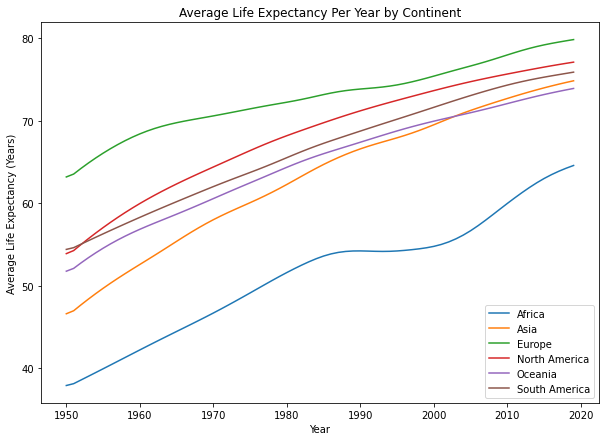

In [24]:
## PLot the data
plt.figure(figsize=(10,7))
plt.plot( af["Period"], af["Life Expectancy"], label = "Africa")
plt.plot( asia["Period"], asia["Life Expectancy"], label = "Asia")
plt.plot( eu["Period"], eu["Life Expectancy"], label = "Europe")
plt.plot( na["Period"], na["Life Expectancy"], label = "North America")
plt.plot( oc["Period"], oc["Life Expectancy"], label = "Oceania")
plt.plot( sa["Period"], sa["Life Expectancy"], label = "South America")
plt.legend(loc = "lower right")
plt.title("Average Life Expectancy Per Year by Continent")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Years)")
plt.savefig("graphs/Average Life Expectancy Per Year by Continent.png")
plt.show()

#### Bar Graphs

Text(0.5, 1.0, 'Average Life Expectancy per Continent')

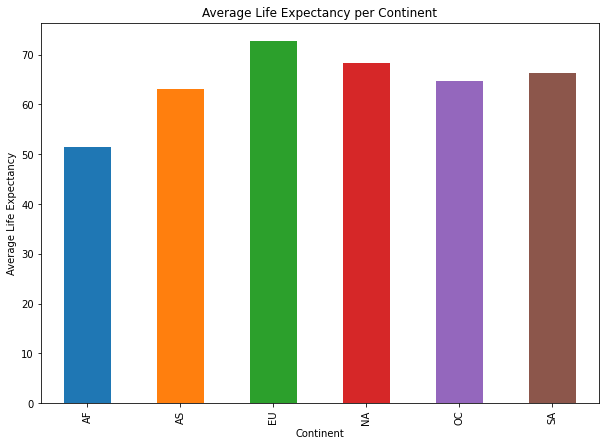

In [25]:
## Clearly, life expectancy is increasing in general
## Let's now look at some basic bar graphs to see other trends

plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Life Expectancy"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy per Continent")

Text(0.5, 1.0, 'Average Number of Pharmicists Per 10,000 per Continent')

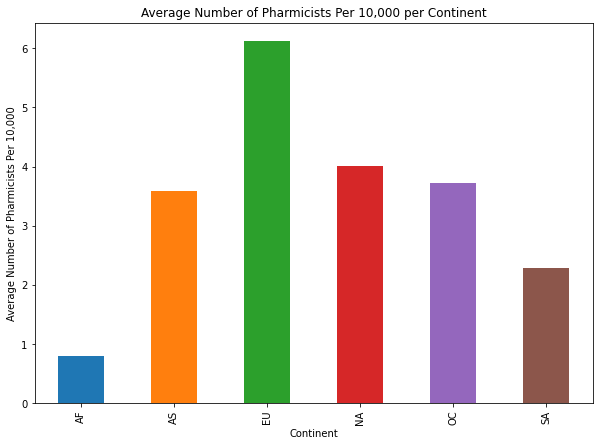

In [26]:
## Avg # of Pharmicists per 10,000 per Continent
plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Pharmicists Per 10,000"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Number of Pharmicists Per 10,000")
plt.title("Average Number of Pharmicists Per 10,000 per Continent")

Text(0.5, 1.0, 'Average Number of Medical Doctors Per 10,000 per Continent')

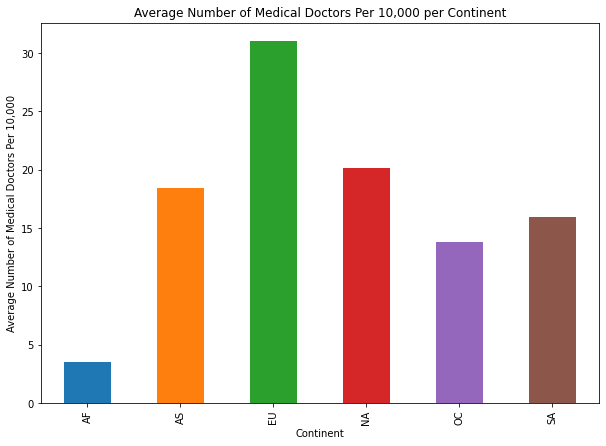

In [27]:
## Avg % of Pop with basic handwashing facilities at home per Continent
plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Medical Doctors Per 10,000"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Number of Medical Doctors Per 10,000")
plt.title("Average Number of Medical Doctors Per 10,000 per Continent")

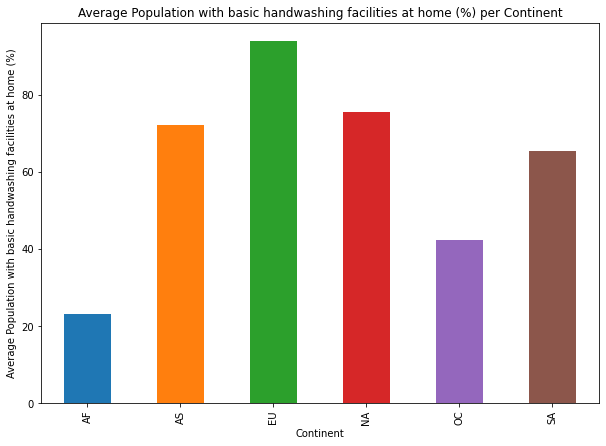

In [28]:
## Avg % of Pop with basic handwashing facilities at home per Continent
plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Population with basic handwashing facilities at home (%)"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Population with basic handwashing facilities at home (%)")
plt.title("Average Population with basic handwashing facilities at home (%) per Continent")
plt.show()

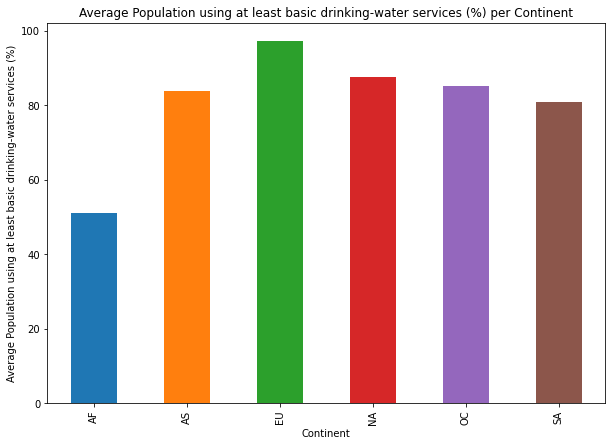

In [29]:
## Average % of pop using at least basic drinking water services by country
plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Population using at least basic drinking-water services (%)"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Population using at least basic drinking-water services (%)")
plt.title("Average Population using at least basic drinking-water services (%) per Continent")
plt.show()

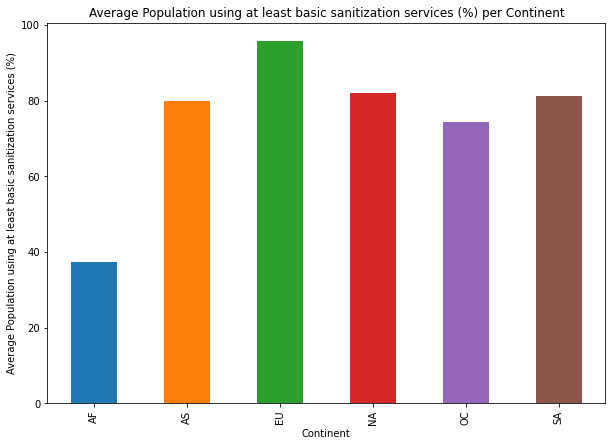

In [30]:
## Average % of pop using at least basic sanitation services by country
plt.figure(figsize = (10, 7))
final_merge_df.groupby(["Continent"])["Population using at least basic sanitization services (%)"].mean().plot(kind = 'bar', color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown'])
plt.ylabel("Average Population using at least basic sanitization services (%)")
plt.title("Average Population using at least basic sanitization services (%) per Continent")
plt.show()

#### Regression

The r-squared is: 0.6639893347886381


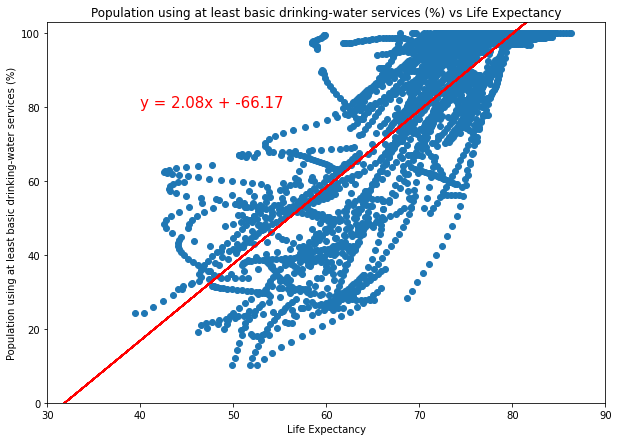

In [31]:
## Now let's run some regressions against life expectancy to see if any of these variables correlate with it

plt.figure(figsize = (10, 7))
x_values = final_merge_df["Life Expectancy"]
y_values = final_merge_df["Population using at least basic drinking-water services (%)"]
mask = ~np.isnan(x_values) & ~np.isnan(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(30,90)
plt.ylim(0,103)
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.title("Population using at least basic drinking-water services (%) vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Population using at least basic drinking-water services (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("graphs/Life Expectancy vs Population using at least basic drinking-water services (%).png")
plt.show()

The r-squared is: 0.6721198877734443


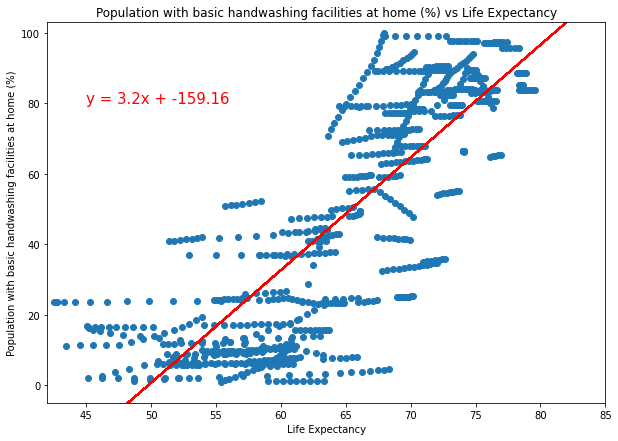

In [32]:
plt.figure(figsize = (10, 7))
x_values = final_merge_df["Life Expectancy"]
y_values = final_merge_df["Population with basic handwashing facilities at home (%)"]
mask = ~np.isnan(x_values) & ~np.isnan(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(42,85)
plt.ylim(-5,103)
plt.annotate(line_eq,(45,80),fontsize=15,color="red")
plt.title("Population with basic handwashing facilities at home (%) vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Population with basic handwashing facilities at home (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("graphs/Life Expectancy vs Population with basic handwashing facilities at home (%).png")
plt.show()

The r-squared is: 0.6986471501216068


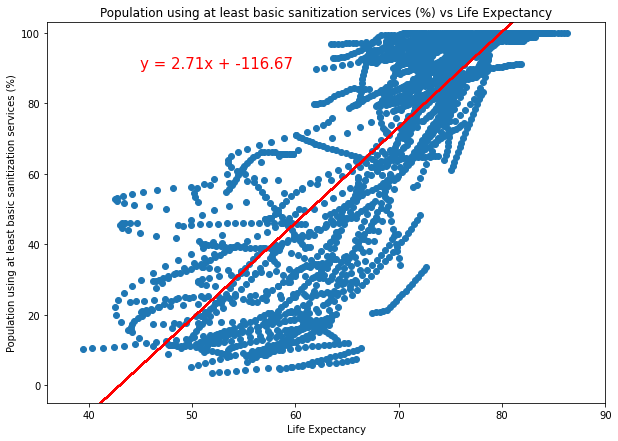

In [33]:
plt.figure(figsize = (10, 7))
x_values = final_merge_df["Life Expectancy"]
y_values = final_merge_df["Population using at least basic sanitization services (%)"]
mask = ~np.isnan(x_values) & ~np.isnan(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(36,90)
plt.ylim(-5,103)
plt.annotate(line_eq,(45,90),fontsize=15,color="red")
plt.title("Population using at least basic sanitization services (%) vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Population using at least basic sanitization services (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("graphs/Life Expectancy vs Population using at least basic sanitization services (%).png")
plt.show()

The r-squared is: 0.3978389176944826


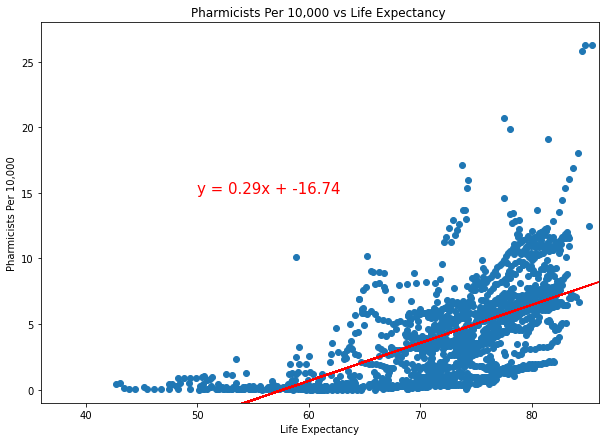

In [34]:
plt.figure(figsize = (10, 7))
x_values = final_merge_df["Life Expectancy"]
y_values = final_merge_df["Pharmicists Per 10,000"]
mask = ~np.isnan(x_values) & ~np.isnan(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(36,86)
plt.ylim(-1,28)
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Pharmicists Per 10,000 vs Life Expectancy ")
plt.xlabel("Life Expectancy")
plt.ylabel("Pharmicists Per 10,000")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("graphs/Life Expectancy vs Pharmicists Per 10,000.png")
plt.show()

The r-squared is: 0.3799855713773227


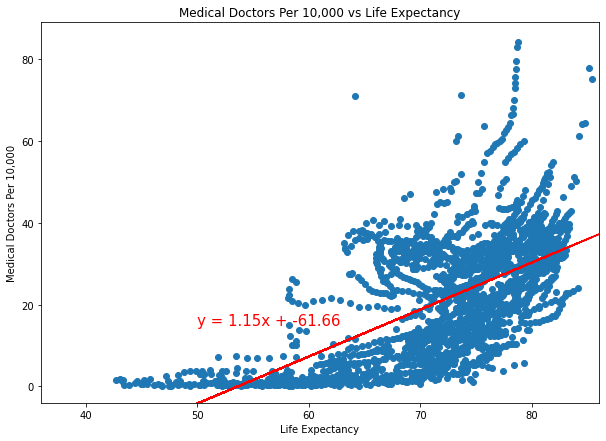

In [35]:
plt.figure(figsize = (10, 7))
x_values = final_merge_df["Life Expectancy"]
y_values = final_merge_df["Medical Doctors Per 10,000"]
mask = ~np.isnan(x_values) & ~np.isnan(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values[mask], y_values[mask])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(36,86)
plt.ylim(-4,89)
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Medical Doctors Per 10,000 vs Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Medical Doctors Per 10,000")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("graphs/Life Expectancy vs Medical Doctors Per 10,000.png")
plt.show()

#### Correlation Matrix

In [36]:
## Now let's take a look at how each of our variables interact with each other via correlation matrix
corr_df = final_merge_df.corr()
heatmap_df = corr_df.drop(['Period']).drop(['Period'],axis=1)
heatmap_df

,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
"Pharmicists Per 10,000",1.000000,0.589678,0.630745,0.535797,0.557283,0.552260
"Medical Doctors Per 10,000",0.589678,1.000000,0.616430,0.664335,0.609439,0.681382
Life Expectancy,0.630745,0.616430,1.000000,0.819829,0.814855,0.835851
Population with basic handwashing facilities at home (%),0.535797,0.664335,0.819829,1.000000,0.780874,0.872386
Population using at least basic drinking-water services (%),0.557283,0.609439,0.814855,0.780874,1.000000,0.860842
Population using at least basic sanitization services (%),0.552260,0.681382,0.835851,0.872386,0.860842,1.000000


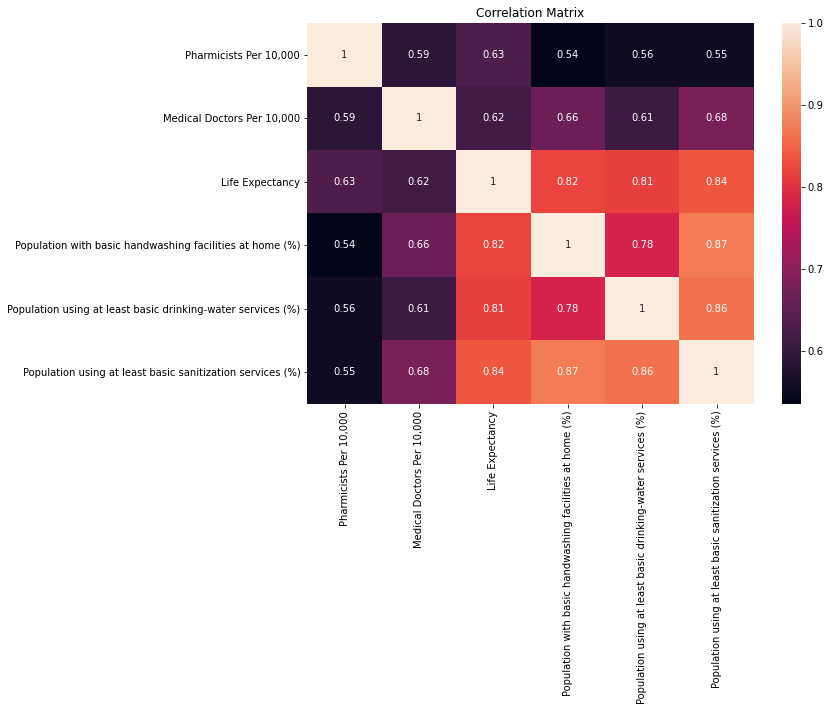

In [37]:
plt.figure(figsize = (10, 7))
plt.title("Correlation Matrix")
sns.heatmap(heatmap_df, annot=True)
plt.savefig("graphs/Correlation Matrix.png")
plt.show()

#### Mapping Our Data

In [38]:
## Let's take a look graphically at how each country compares in terms of average life expectancy

## First, import a shape file for the world so we can plot this stuff
fp = "resources/World_Countries__Generalized_.shp"
map_df = gpd.read_file(fp)

In [39]:
map_df

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


In [40]:
## Filter out AFF ISO and average Life Epectancy from the original df, pull into another dataframe, and reformat for merging
iso_df = final_merge_df.filter(["AFF_ISO", "Life Expectancy"], axis =1).set_index("AFF_ISO")
iso_df = iso_df.groupby(["AFF_ISO"])["Life Expectancy"].mean().to_frame()
iso_df = iso_df.rename(columns = {"Life Expectancy" : "avg_life"})

In [41]:
## Now merge on AFF ISO to get avg life expectancy into a dataframe
map_merge_df = pd.merge(map_df, iso_df, on ="AFF_ISO")
map_merge_df

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,avg_life
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",74.068514
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...",74.068514
2,55,Puerto Rico,PR,United States,US,4.788618,0.781351,"MULTIPOLYGON (((-65.83667 18.05583, -65.84029 ...",74.068514
3,68,US Virgin Islands,VI,United States,US,1.236628,0.025685,"MULTIPOLYGON (((-64.89612 17.67666, -64.89140 ...",74.068514
4,155,United States,US,United States,US,726.106056,1116.670604,"MULTIPOLYGON (((-76.39501 39.22999, -76.38695 ...",74.068514
...,...,...,...,...,...,...,...,...,...
242,244,Micronesia,FM,Micronesia,FM,1.042421,0.042206,"MULTIPOLYGON (((158.22775 6.78055, 158.18469 6...",NaN
243,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7...",64.253986
244,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580...",66.949186
245,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35...",75.355614


In [42]:
## Convert the merged map dataframe into a geodataframe
gdf = gpd.GeoDataFrame(map_merge_df)

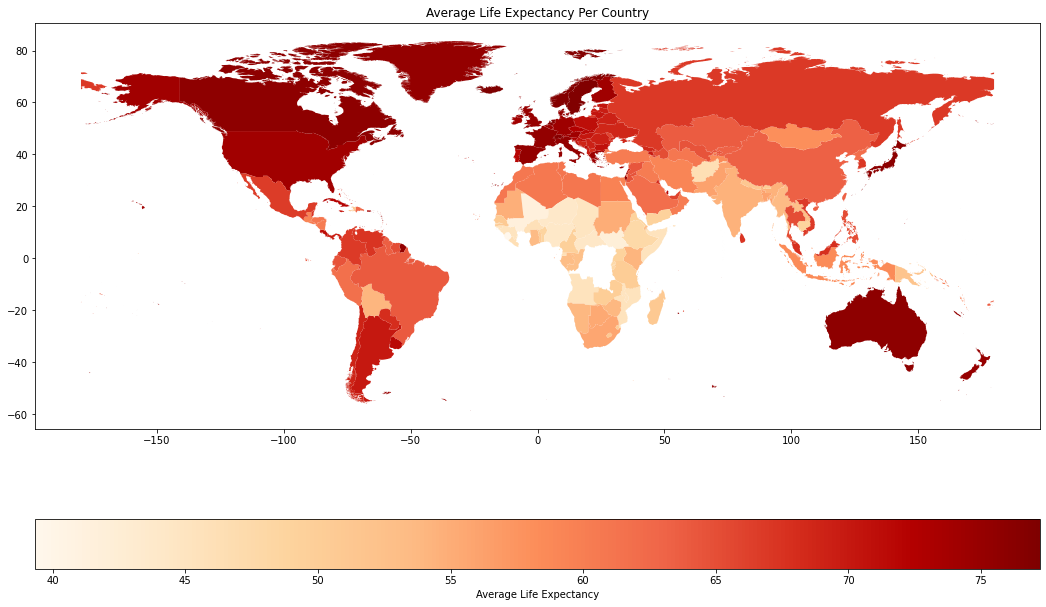

In [43]:
## Now plot!
gdf.plot(column = "avg_life", 
         figsize =(18,11), 
         legend = True, 
         cmap='OrRd', 
         legend_kwds={'label': "Average Life Expectancy", 
                      'orientation': "horizontal"}).set_title("Average Life Expectancy Per Country")
plt.savefig("graphs/Average Life Expectancy by Continent.png")